# Multiple Linear Regression in Statsmodels

## Introduction

In this lecture, you'll learn how to run your first multiple linear regression model.

## Objectives
You will be able to:
* Use statsmodels to fit a multiple linear regression model
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters

## Statsmodels for multiple linear regression

This lesson will be more of a code-along, where you'll walk through a multiple linear regression model using both statsmodels and scikit-learn. 

Recall the initial regression model presented. It determines a line of best fit by minimizing the sum of squares of the errors between the models predictions and the actual data. In algebra and statistics classes, this is often limited to the simple 2 variable case of $y=mx+b$, but this process can be generalized to use multiple predictive variables.

## Auto-mpg data

The code below reiterates the steps you've seen before: 
* Creating dummy variables for each categorical feature
* Log-transforming select continuous predictors

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('auto-mpg.csv') 
data['horsepower'].astype(str).astype(int)

acc = data['acceleration']
logdisp = np.log(data['displacement'])
loghorse = np.log(data['horsepower'])
logweight= np.log(data['weight'])

scaled_acc = (acc-min(acc))/(max(acc)-min(acc))	
scaled_disp = (logdisp-np.mean(logdisp))/np.sqrt(np.var(logdisp))
scaled_horse = (loghorse-np.mean(loghorse))/(max(loghorse)-min(loghorse))
scaled_weight= (logweight-np.mean(logweight))/np.sqrt(np.var(logweight))

data_fin = pd.DataFrame([])
data_fin['acc'] = scaled_acc
data_fin['disp'] = scaled_disp
data_fin['horse'] = scaled_horse
data_fin['weight'] = scaled_weight
cyl_dummies = pd.get_dummies(data['cylinders'], prefix='cyl', drop_first=True)
yr_dummies = pd.get_dummies(data['model year'], prefix='yr', drop_first=True)
orig_dummies = pd.get_dummies(data['origin'], prefix='orig', drop_first=True)
mpg = data['mpg']
data_fin = pd.concat([mpg, data_fin, cyl_dummies, yr_dummies, orig_dummies], axis=1)

In [2]:
data_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 23 columns):
mpg       392 non-null float64
acc       392 non-null float64
disp      392 non-null float64
horse     392 non-null float64
weight    392 non-null float64
cyl_4     392 non-null uint8
cyl_5     392 non-null uint8
cyl_6     392 non-null uint8
cyl_8     392 non-null uint8
yr_71     392 non-null uint8
yr_72     392 non-null uint8
yr_73     392 non-null uint8
yr_74     392 non-null uint8
yr_75     392 non-null uint8
yr_76     392 non-null uint8
yr_77     392 non-null uint8
yr_78     392 non-null uint8
yr_79     392 non-null uint8
yr_80     392 non-null uint8
yr_81     392 non-null uint8
yr_82     392 non-null uint8
orig_2    392 non-null uint8
orig_3    392 non-null uint8
dtypes: float64(5), uint8(18)
memory usage: 22.3 KB


For now, let's simplify the model and only inlude `'acc'`, `'horse'` and the three `'orig'` categories in our final data.

In [3]:
data_ols = pd.concat([mpg, scaled_acc, scaled_weight, orig_dummies], axis=1)
data_ols.head()

,mpg,acceleration,weight,orig_2,orig_3
0,18.0,0.238095,0.720986,0,0
1,15.0,0.208333,0.908047,0,0
2,18.0,0.178571,0.651205,0,0
3,16.0,0.238095,0.648095,0,0
4,17.0,0.148810,0.664652,0,0


## A linear model using statsmodels

Now, let's use the `statsmodels.api` to run OLS on all of the data. Just like for linear regression with a single predictor, you can use the formula $y \sim X$ with $n$ predictors where $X$ is represented as $x_1+\ldots+x_n$.

In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [5]:
formula = 'mpg ~ acceleration+weight+orig_2+orig_3'
model = ols(formula=formula, data=data_ols).fit()

Having to type out all the predictors isn't practical when you have many. Another better way than to type them all out is to seperate out the outcome variable `'mpg'` out of your DataFrame, and use the a `'+'.join()` command on the predictors, as done below:

In [6]:
outcome = 'mpg'
predictors = data_ols.drop('mpg', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [7]:
model = ols(formula=formula, data=data_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     256.7
Date:                Wed, 18 Mar 2020   Prob (F-statistic):          1.86e-107
Time:                        21:36:57   Log-Likelihood:                -1107.2
No. Observations:                 392   AIC:                             2224.
Df Residuals:                     387   BIC:                             2244.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       20.7608      0.688     30.181      0.000      19.408      22.113
acceleration     5.0494      1.389      3.634      0.000       2.318       7.781
weight          -5.8764      0.282    -20.831      0.000      -6.431      -5.322
orig_2           0.4124      0.639      0.645      0.519      -0.844       1.669
orig_3           1.7218      0.653      2.638      0.009       0.438       3.005
==============================================================================
Omnibus:                       37.427   Durbin-Watson:                   0.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.989
Skew:                           0.648   Prob(JB):                     6.95e-13
Kurtosis:                       4.322   Cond. No.                         8.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Or even easier, simply use the `ols()` function from `statsmodels.api`. The advantage is that you don't have to create the summation string. Important to note, however, is that the intercept term is not included by default, so you have to make sure you manipulate your `predictors` DataFrame so it includes a constant term. You can do this using `.add_constant`.

In [8]:
import statsmodels.api as sm
predictors_int = sm.add_constant(predictors)
model = sm.OLS(data['mpg'],predictors_int).fit()
model.summary()

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     256.7
Date:                Thu, 26 Sep 2019   Prob (F-statistic):          1.86e-107
Time:                        12:01:03   Log-Likelihood:                -1107.2
No. Observations:                 392   AIC:                             2224.
Df Residuals:                     387   BIC:                             2244.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           20.7608      0.688     30.181      0.000      19.408      22.113
acceleration     5.0494      1.389      3.634      0.000       2.318       7.781
weight          -5.8764      0.282    -20.831      0.000      -6.431      -5.322
orig_2           0.4124      0.639      0.645      0.519      -0.844       1.669
orig_3           1.7218      0.653      2.638      0.009       0.438       3.005
==============================================================================
Omnibus:                       37.427   Durbin-Watson:                   0.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.989
Skew:                           0.648   Prob(JB):                     6.95e-13
Kurtosis:                       4.322   Cond. No.                         8.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
data_ols.corr()

,mpg,acceleration,weight,orig_2,orig_3
mpg,1.000000,0.423329,-0.844194,0.244313,0.451454
acceleration,0.423329,1.000000,-0.401563,0.208298,0.115020
weight,-0.844194,-0.401563,1.000000,-0.295206,-0.471220
orig_2,0.244313,0.208298,-0.295206,1.000000,-0.230157
orig_3,0.451454,0.115020,-0.471220,-0.230157,1.000000


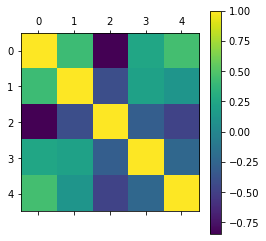

In [12]:
plt.matshow(data_ols.corr())
cb = plt.colorbar()

## Interpretation

Just like for single multiple regression, the coefficients for the model should be interpreted as "how does $y$ change for each additional unit $X$"? However, do note that since $X$ was transformed, the interpretation can sometimes require a little more attention. In fact, as the model is built on the transformed $X$, the actual relationship is "how does $y$ change for each additional unit $X'$", where $X'$ is the (log- and min-max, standardized,...) transformed data matrix.

## Linear regression using scikit-learn

You can also repeat this process using scikit-learn. The code to do this can be found below. The scikit-learn package is known for its machine learning functionalities and generally very popular when it comes to building a clear data science workflow. It is also commonly used by data scientists for regression. The disadvantage of scikit-learn compared to statsmodels is that it doesn't have some statistical metrics like the p-values of the parameter estimates readily available. For a more *ad-hoc* comparison of scikit-learn and statsmodels, you can read this blogpost: https://blog.thedataincubator.com/2017/11/scikit-learn-vs-statsmodels/.

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
y = data_ols['mpg']
linreg = LinearRegression()
linreg.fit(predictors, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# coefficients
linreg.coef_

array([ 5.04941007, -5.87640551,  0.41237454,  1.72184708])

The intercept of the model is stored in the `.intercept_` attribute.

In [12]:
# intercept
linreg.intercept_

20.760757080821836

## Summary

Congrats! You now know how to build a linear regression model with multiple predictors in statsmodel and scikit-learn. You also took a look at the statistical performance metrics pertaining to the overall model and its parameters!